In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [247]:
df_original = pd.read_csv("Wimbledon_featured_matches.csv")


df = df_original.loc[df_original["player1"] == "Carlos Alcaraz"]
df = df.loc[df["player2"] == "Novak Djokovic"]
df = df[["match_id","set_no","p1_sets","p2_sets","p1_games","p2_games","p1_score","p2_score",
         "serve_depth","serve_width","point_victor","server"]].drop_duplicates()
df = df.reset_index(drop = True)
p1_scores = (df["point_victor"] == 1).sum() 
p2_scores = (df["point_victor"] == 2).sum()
p1 = p1_scores / (p1_scores + p2_scores)
p2 = p2_scores / (p1_scores + p2_scores)
p2

0.49390243902439024

In [248]:
df['c1'] = 0
df["c2"] = 0

for i in range(len(df)):
    if df['point_victor'].iloc[i] == 1:
        if i == 0 or df['point_victor'].iloc[i-1] != 1:
            df['c1'].iloc[i] = 1
        elif df['point_victor'].iloc[i-1] == 1:
            if i-2 >= 0 and df['point_victor'].iloc[i-2] == 2:
                df['c1'].iloc[i] = 2
            else:
                # 上一行是1，上上行也是1
                df['c1'].iloc[i] = 3
    elif df['point_victor'].iloc[i] == 2:
        # 本行为2
        df['c1'].iloc[i] = 0


for i in range(len(df)):
    if df['point_victor'].iloc[i] == 2:
        if i == 0 or df['point_victor'].iloc[i-1] != 2:
            df['c2'].iloc[i] = 1
        elif df['point_victor'].iloc[i-1] == 2:
            if i-2 >= 0 and df['point_victor'].iloc[i-2] == 1:
                df['c2'].iloc[i] = 2
            else:
                # 上一行是1，上上行也是1
                df['c2'].iloc[i] = 3
    elif df['point_victor'].iloc[i] == 1:
        # 本行为2
        df['c2'].iloc[i] = 0
df.head()

/var/folders/1q/5q9chvz155v7fk5y092qb7_m0000gn/T/ipykernel_45919/3600991393.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c1'].iloc[i] = 0
/var/folders/1q/5q9chvz155v7fk5y092qb7_m0000gn/T/ipykernel_45919/3600991393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c1'].iloc[i] = 1
/var/folders/1q/5q9chvz155v7fk5y092qb7_m0000gn/T/ipykernel_45919/3600991393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c1'].il

,match_id,set_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,serve_depth,serve_width,point_victor,server,c1,c2
0,2023-wimbledon-1701,1,0,0,0,0,0,0,CTL,W,2,2,0,1
1,2023-wimbledon-1701,1,0,0,0,0,0,15,NCTL,BW,1,2,1,0
2,2023-wimbledon-1701,1,0,0,0,0,15,15,NCTL,BW,1,2,2,0
3,2023-wimbledon-1701,1,0,0,0,0,30,15,CTL,BC,2,2,0,1
4,2023-wimbledon-1701,1,0,0,0,0,30,30,CTL,W,1,2,1,0


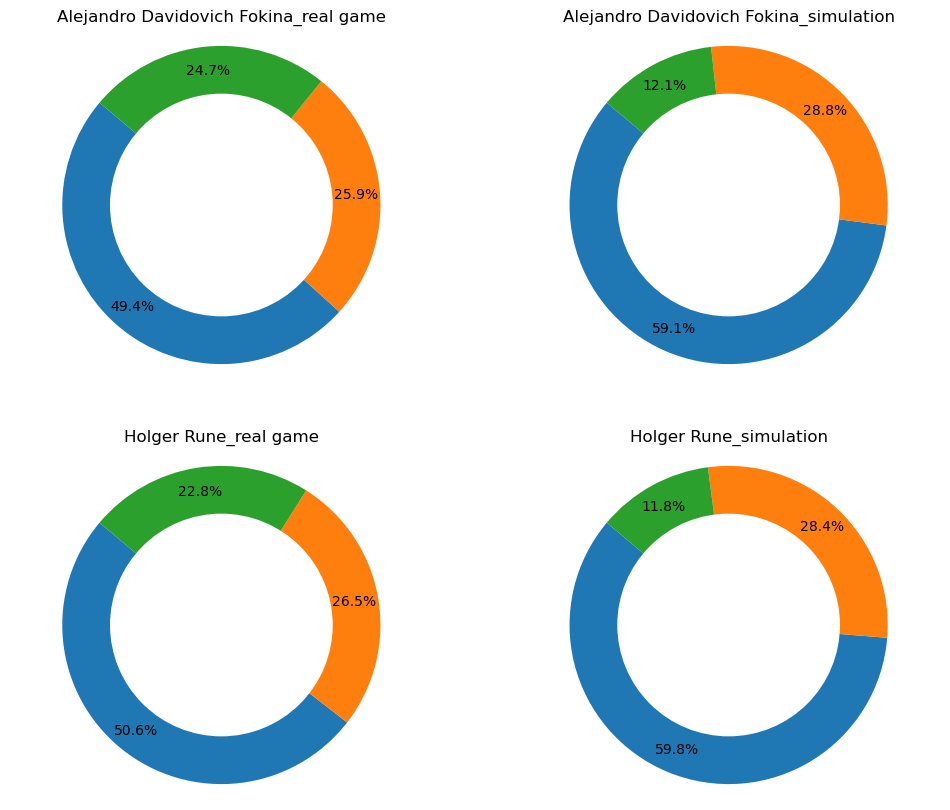

In [249]:
single1 = (df['c1'] == 1).sum()
three1 = (df['c1'] == 3).sum()
two1 = (df["point_victor"] == 1).sum() - single1 - three1

single2 =  (df['c2'] == 1).sum()
three2 =  (df['c2'] == 3).sum()
two2 =  (df["point_victor"] == 2).sum() - single2 - three2


a1 = [0,0,0]
b1 = [0,0,0]

def simulate_match(p1, p2, a1, b1):
    score1, score2 = 0, 0  # 分数初始化
    rounds_won1, rounds_won2 = 0, 0  # 赢得的局数
    a = 0
    b = 0
    while True:
        # 模拟每一局的胜负
        if np.random.rand() < p1 :
            rounds_won1 += 1
            a += 1
            b = 0
            if a == 1:
                a1[0] += 1
            elif a == 2:
                a1[1] += 1
            elif a >= 3:
                a1[2] += 1

        else:
            b += 1
            a = 0
            if b == 1:
                b1[0] += 1
            elif b == 2:
                b1[1] += 1
            elif b >= 3:
                b1[2] += 1
            rounds_won2 += 1
        
        # 更新分数
        if rounds_won1 == 1:
            score1 = 15
        elif rounds_won1 == 2:
            score1 = 30
        elif rounds_won1 >= 3:
            score1 = 40
        
        if rounds_won2 == 1:
            score2 = 15
        elif rounds_won2 == 2:
            score2 = 30
        elif rounds_won2 >= 3:
            score2 = 40
        
        # 检查比赛是否结束
        if score1 == 40 and score2 < 30:
            
            break
        elif score2 == 40 and score1 < 30:
            
            break
        elif score1 == 40  and rounds_won1 > rounds_won2 + 1:
            
            break
        elif score2 == 40  and rounds_won2 > rounds_won1 + 1:
            
            break
    
    return a1, b1



for i in range(100000):
    a1, b1 = simulate_match(p1, p2, a1, b1)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sizes = [single1, two1, three1]
axs[0,0].pie(sizes, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[0,0].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[0,0].axis('equal')  # 保证饼状图是圆形
axs[0,0].set_title("Alejandro Davidovich Fokina_real game")  # 添加图形名称


sizes = [single2, two2, three2]
axs[1,0].pie(sizes, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[1,0].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[1,0].axis('equal')  # 保证饼状图是圆形
axs[1,0].set_title("Holger Rune_real game")  # 添加图形名称

axs[0,1].pie(a1, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[0,1].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[0,1].axis('equal')  # 保证饼状图是圆形
axs[0,1].set_title("Alejandro Davidovich Fokina_simulation")  # 添加图形名称


axs[1,1].pie(b1, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[1,1].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[1,1].axis('equal')  # 保证饼状图是圆形
axs[1,1].set_title("Holger Rune_simulation")  # 添加图形名称
plt.savefig("/Users/wangqinxin/Desktop/mcm/distribution/"+df["match_id"].values[0]+".png", bbox_inches='tight')
plt.show()

10


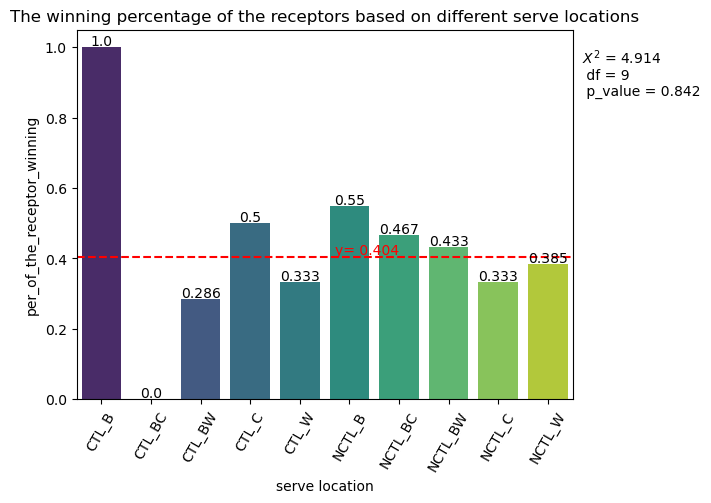

10


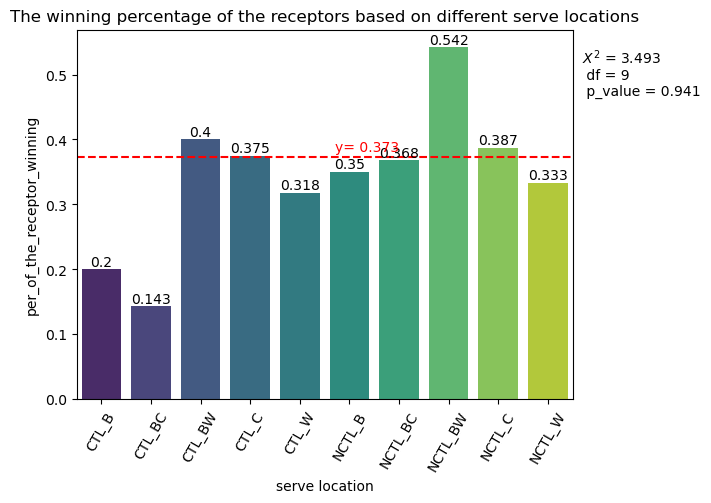

point_victor,serve location,p1 winning,p2 winning,total,p1,p2,per_of_winning,X2
0,CTL_B,4,1,5,0.626667,0.373333,0.200,0.402381
1,CTL_BC,6,1,7,0.626667,0.373333,0.143,0.995986
2,CTL_BW,3,2,5,0.626667,0.373333,0.400,0.009524
3,CTL_C,5,3,8,0.626667,0.373333,0.375,0.000060
4,CTL_W,15,7,22,0.626667,0.373333,0.318,0.179242
5,NCTL_B,13,7,20,0.626667,0.373333,0.350,0.029167
6,NCTL_BC,12,7,19,0.626667,0.373333,0.368,0.001228
7,NCTL_BW,11,13,24,0.626667,0.373333,0.542,1.821607
8,NCTL_C,19,12,31,0.626667,0.373333,0.387,0.015730
9,NCTL_W,6,3,9,0.626667,0.373333,0.333,0.038571


In [250]:
df["serve location"] = df["serve_depth"]+"_" + df["serve_width"]
df.dropna(axis= 0, inplace= True)
df2 = df.loc[df["server"] == 1]
df1 = df.loc[df["server"] == 2]


for i in range(2):
    if i == 0:
        data = df1
    else:
        data = df2
    
    contingency_table_binary = pd.crosstab(data['serve location'], data['point_victor'])
    contingency_table_binary.reset_index(inplace=True)
    contingency_table_binary["p1 winning"] = contingency_table_binary[1]
    contingency_table_binary["p2 winning"] = contingency_table_binary[2]

    contingency_table_binary["total"] = contingency_table_binary["p1 winning"]+contingency_table_binary["p2 winning"]

    p1 = contingency_table_binary["p1 winning"].sum() / contingency_table_binary["total"].sum()
    p2 = contingency_table_binary["p2 winning"].sum() / contingency_table_binary["total"].sum()
    
    contingency_table_binary["p1"] = p1
    contingency_table_binary["p2"] = p2

    if i == 0:
        contingency_table_binary["per_of_winning"] =round(contingency_table_binary[1] / (contingency_table_binary[1] + contingency_table_binary[2]),3)
    else:
        contingency_table_binary["per_of_winning"] =round(contingency_table_binary[2] / (contingency_table_binary[1] + contingency_table_binary[2]),3)
    
    contingency_table_binary.drop([1,2], axis = 1, inplace= True)

    if i == 0:
        contingency_table_binary["X2"] = (contingency_table_binary["p1 winning"]- contingency_table_binary["p1"]*contingency_table_binary["total"])**2 / (contingency_table_binary["p1"]*contingency_table_binary["total"])
    else:
        contingency_table_binary["X2"] = (contingency_table_binary["p2 winning"]- contingency_table_binary["p2"]*contingency_table_binary["total"])**2 / (contingency_table_binary["p2"]*contingency_table_binary["total"])
    
    X2 = contingency_table_binary["X2"].sum()

    if i== 0:
        y_value = p1
    else:
        y_value = p2

    sns.barplot(data = contingency_table_binary, x = contingency_table_binary["serve location"], y = contingency_table_binary["per_of_winning"],palette="viridis")
    plt.axhline(y_value, color='red', linestyle='--')

# 在柱形图上标注每个柱子的y值
    print(contingency_table_binary["total"].count())
    for row in range(contingency_table_binary["total"].count()):
            plt.text(row, contingency_table_binary["per_of_winning"][row]+0.005, s=str(contingency_table_binary["per_of_winning"][row]), 
                    ha='center')  # 将文本放在柱子上方，水平居中

    # 标注横线的位置（y值）
    plt.text(len(contingency_table_binary)-4, y_value+0.008 , s="y= " + str(round(y_value,3)), 
            ha='right', color='red')  # 将文本放在图表的右侧，稍微高于横线

    plt.title('The winning percentage of the receptors based on different serve locations')
    plt.xlabel('serve location')
    plt.ylabel('per_of_the_receptor_winning')
    plt.xticks(rotation=60)

    p_value =  1 - chi2.cdf(X2, 9)
    plt.text(9.7, contingency_table_binary["per_of_winning"].max(), s = "$X^2$ = " + str(round(contingency_table_binary["X2"].sum(),3)) + "\n df = 9" + "\n p_value = " +  str(round(p_value,3)), va = "top")
    plt.savefig("/Users/wangqinxin/Desktop/mcm/location/"+str(i)+".png", bbox_inches='tight') 
    plt.show()

contingency_table_binary


In [141]:
df = pd.read_csv("Wimbledon_featured_matches.csv",na_values="NA")
df = df[["match_id","player1","player2","p1_sets","p2_sets",
         "p1_games","p2_games","serve_no","p1_score","p2_score","server","point_victor",
         "game_victor","set_victor","p1_ace","p2_ace","p1_winner","p2_winner","winner_shot_type",
         "p1_unf_err","p2_unf_err","p1_net_pt","p2_net_pt",
         "p1_net_pt_won","p2_net_pt_won","p1_break_pt_won","p2_break_pt_won",
         "p1_break_pt_missed","p2_break_pt_missed","p1_distance_run","p2_distance_run","rally_count","speed_mph",
         "serve_width","serve_depth","return_depth"]]


2023-wimbledon-1301


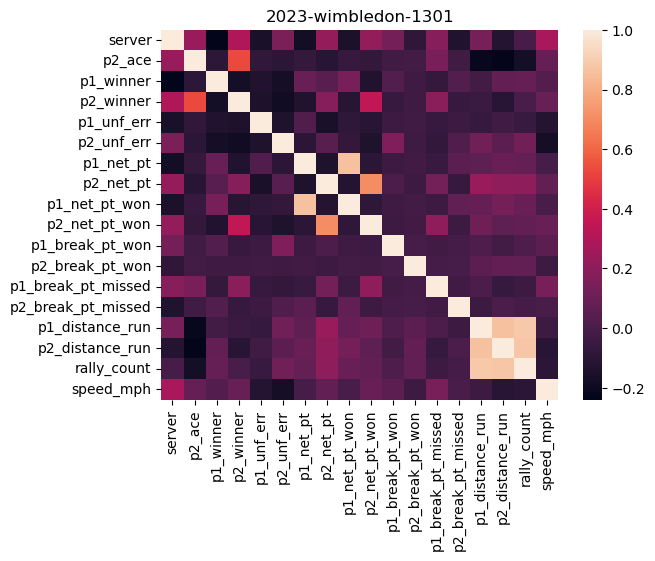

2023-wimbledon-1302


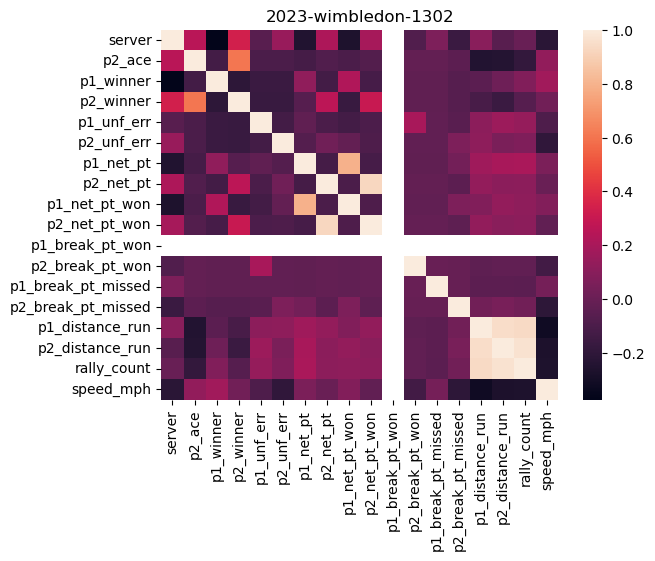

2023-wimbledon-1303


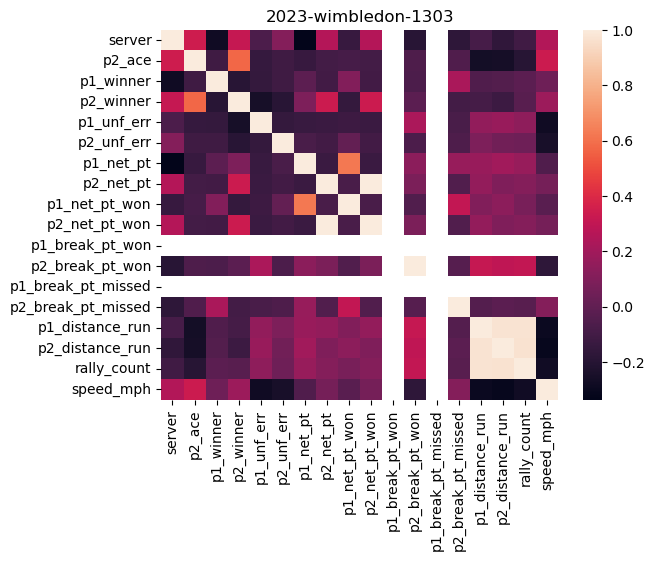

2023-wimbledon-1304


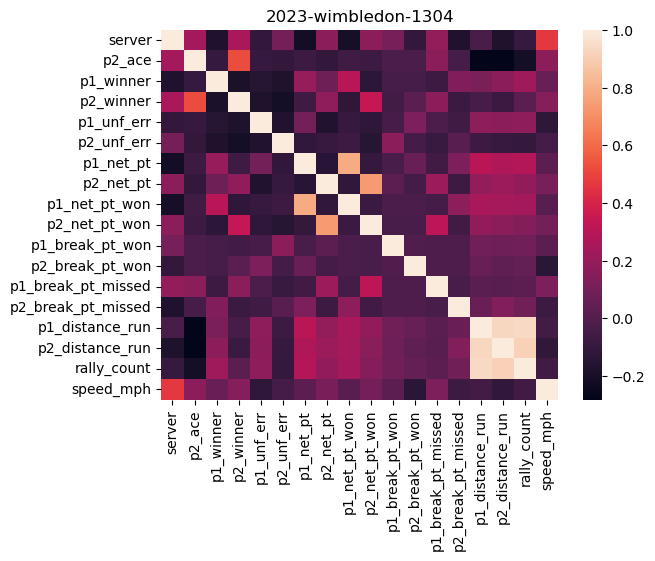

2023-wimbledon-1305


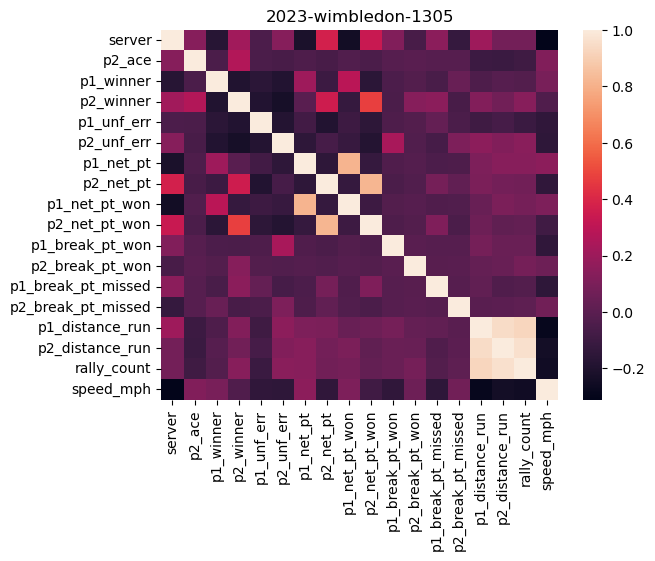

2023-wimbledon-1306


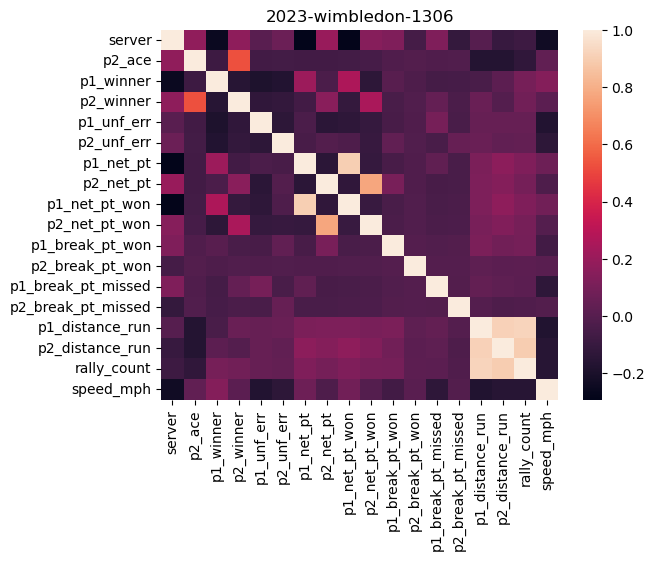

2023-wimbledon-1307


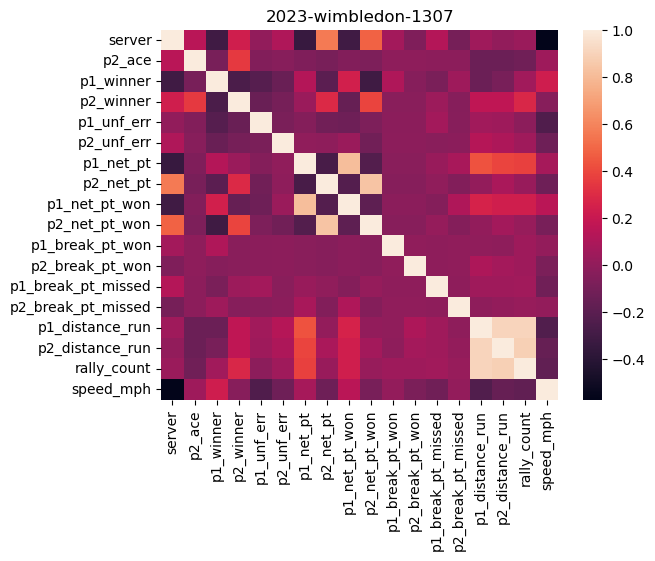

2023-wimbledon-1308


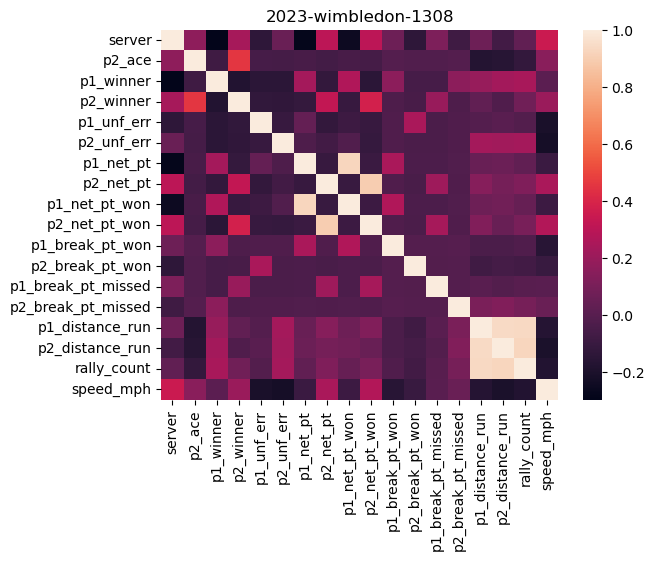

2023-wimbledon-1309


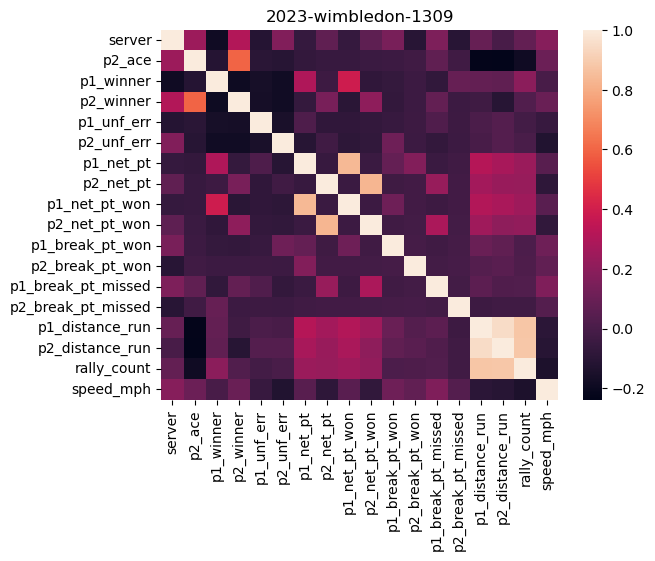

2023-wimbledon-1310


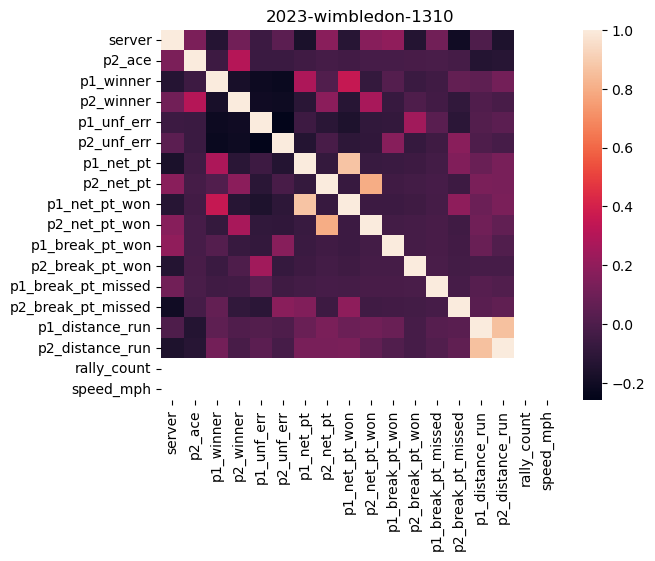

2023-wimbledon-1311


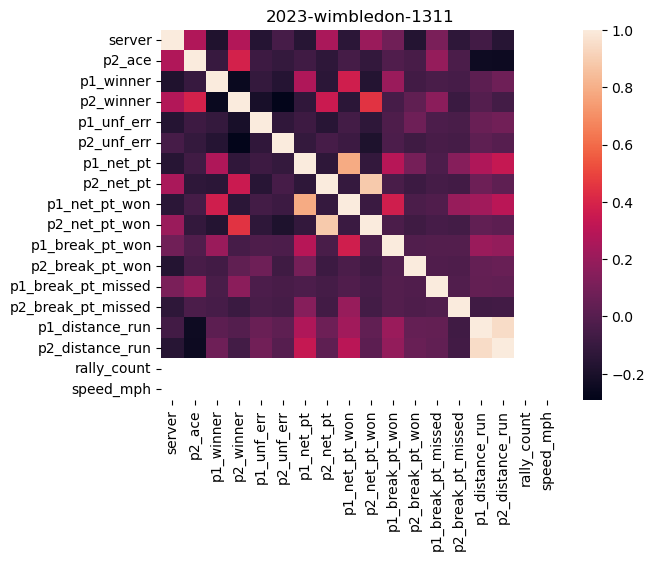

2023-wimbledon-1312


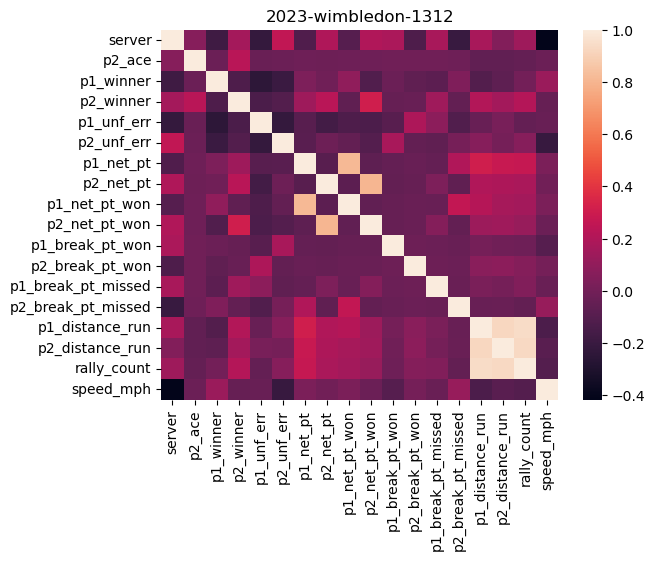

2023-wimbledon-1313


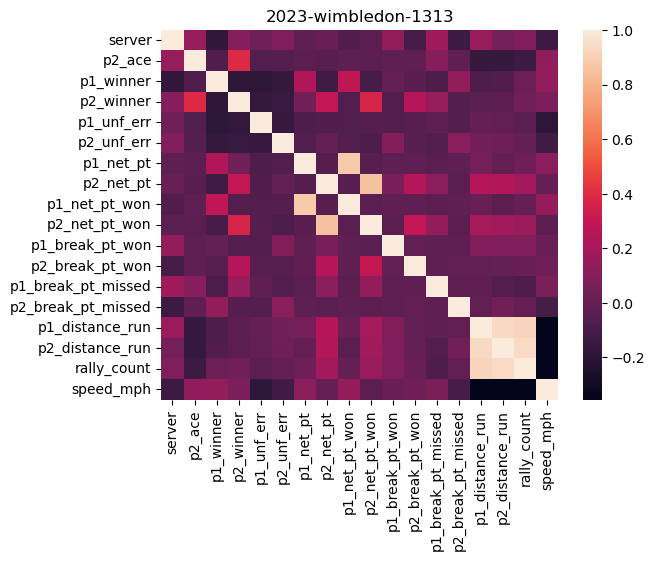

2023-wimbledon-1314


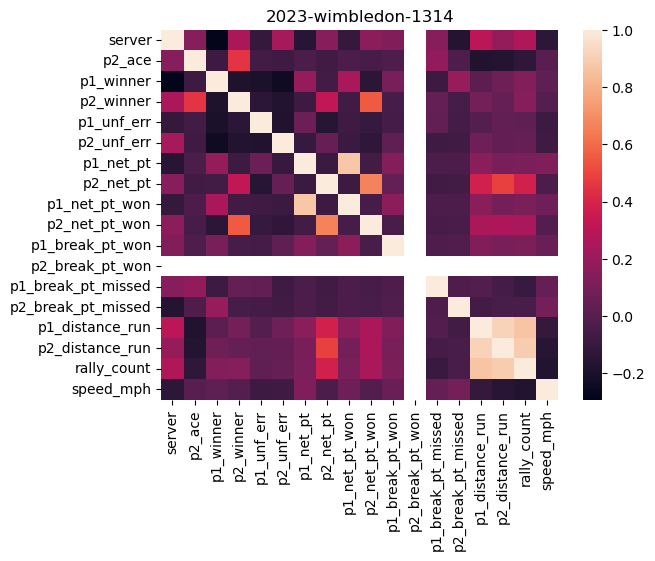

2023-wimbledon-1315


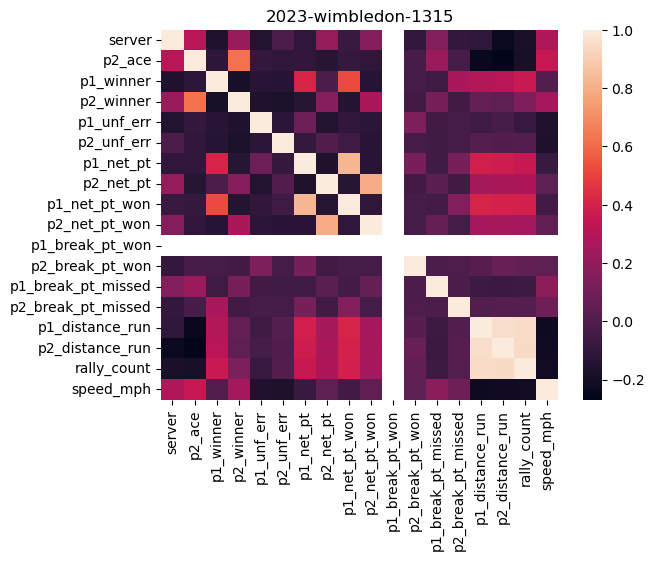

2023-wimbledon-1316


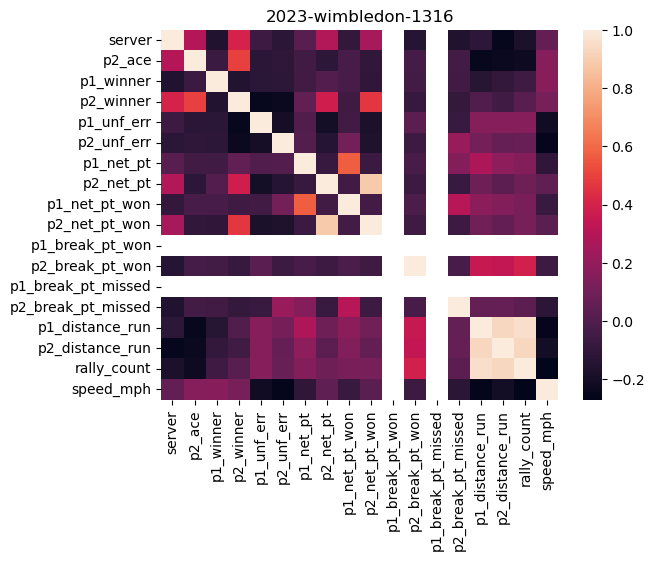

2023-wimbledon-1401


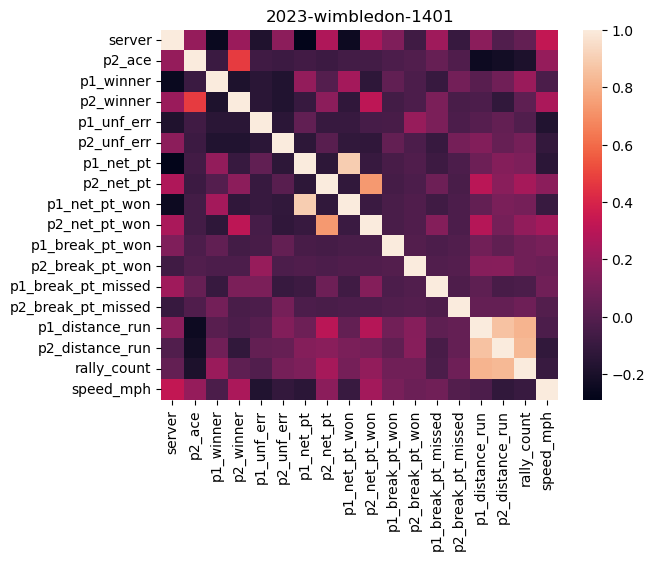

2023-wimbledon-1402


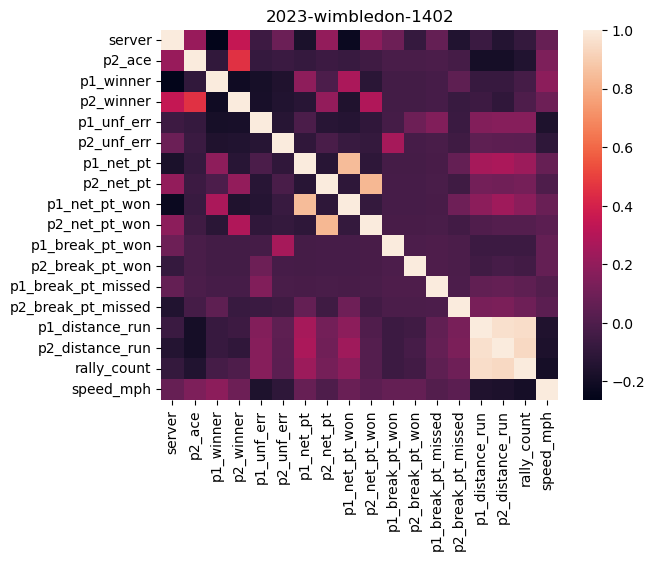

2023-wimbledon-1403


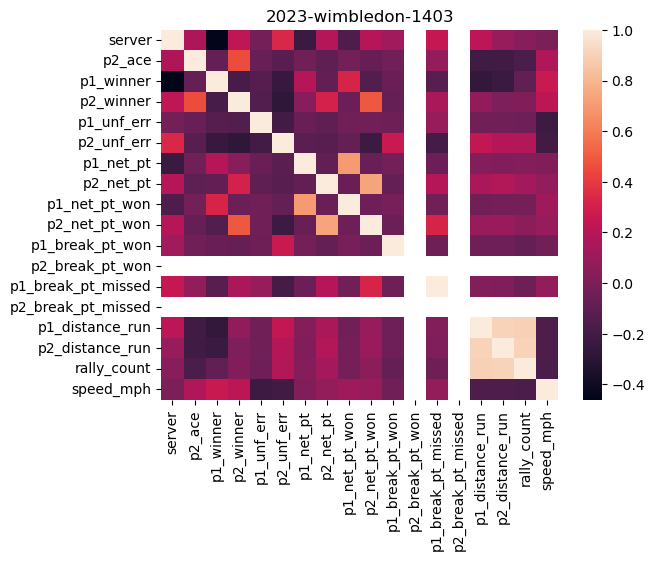

2023-wimbledon-1404


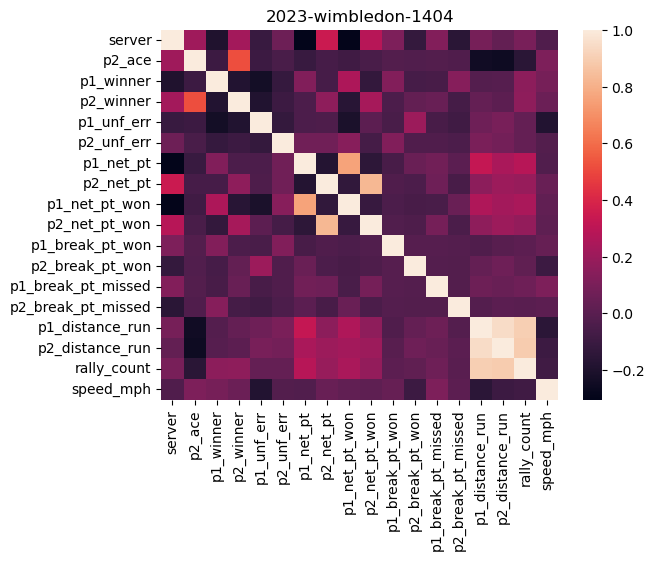

2023-wimbledon-1405


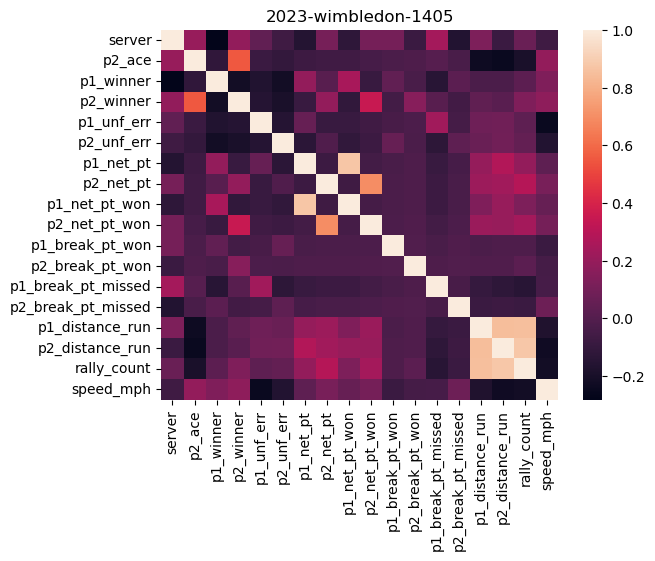

2023-wimbledon-1406


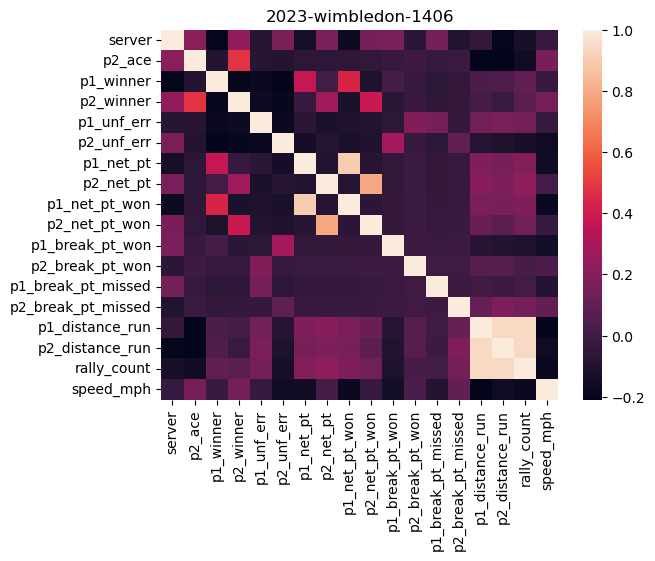

2023-wimbledon-1407


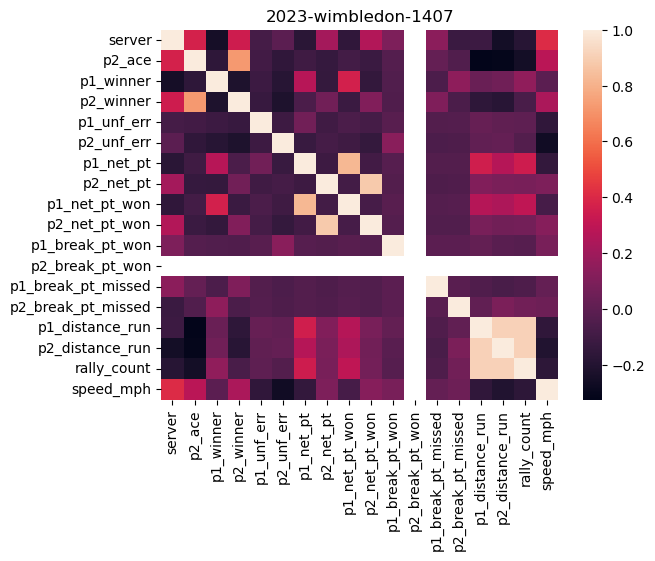

2023-wimbledon-1408


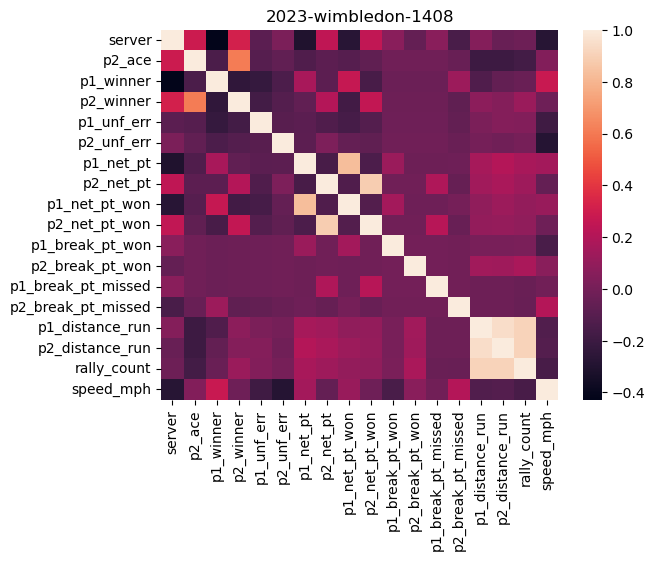

2023-wimbledon-1501


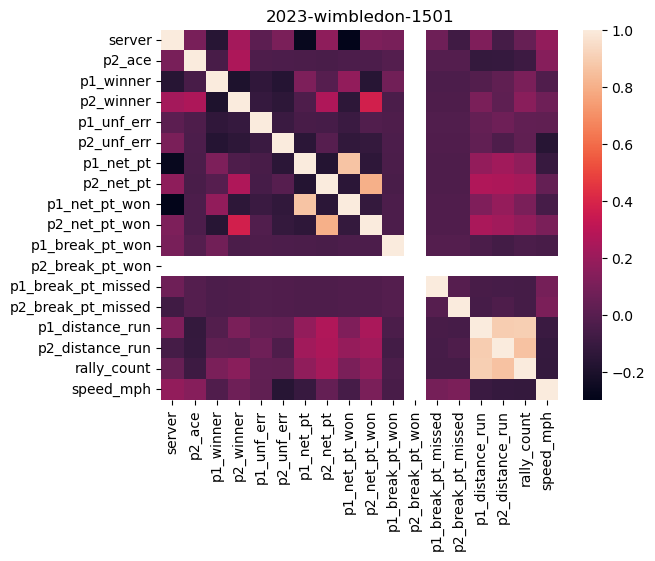

2023-wimbledon-1502


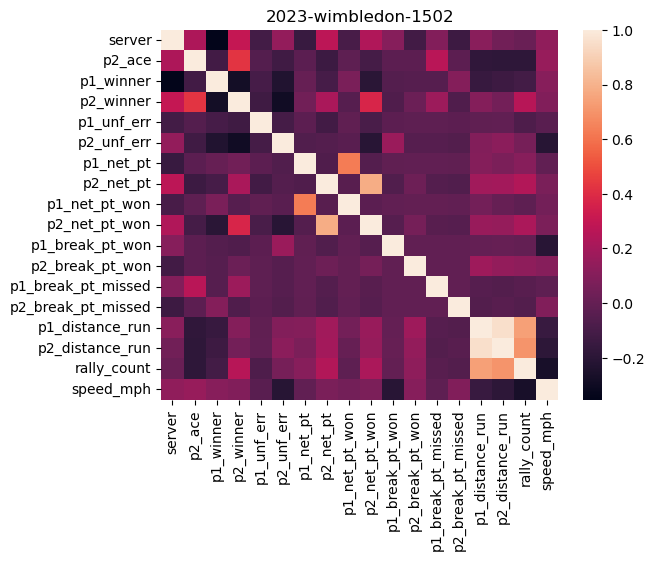

2023-wimbledon-1503


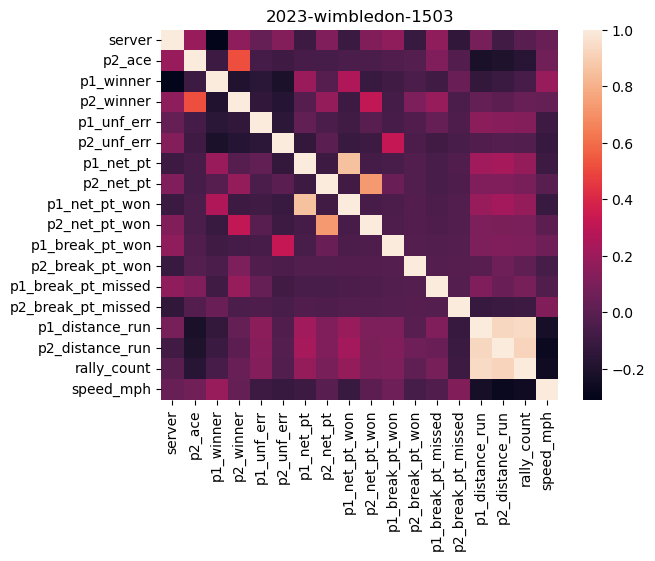

2023-wimbledon-1504


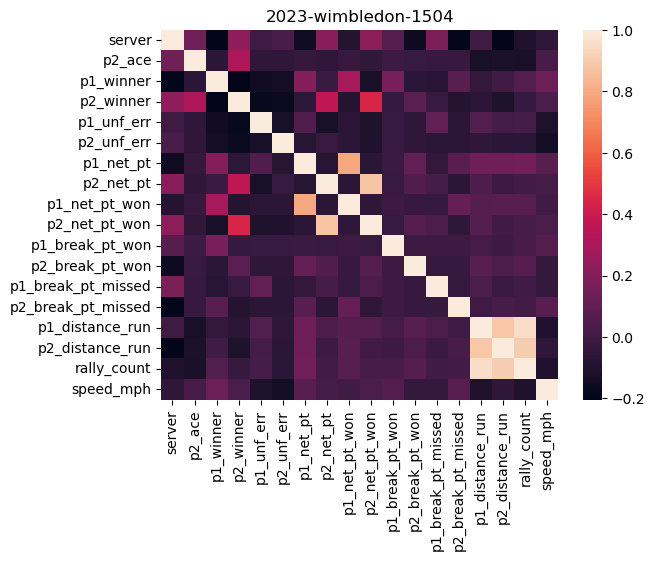

2023-wimbledon-1601


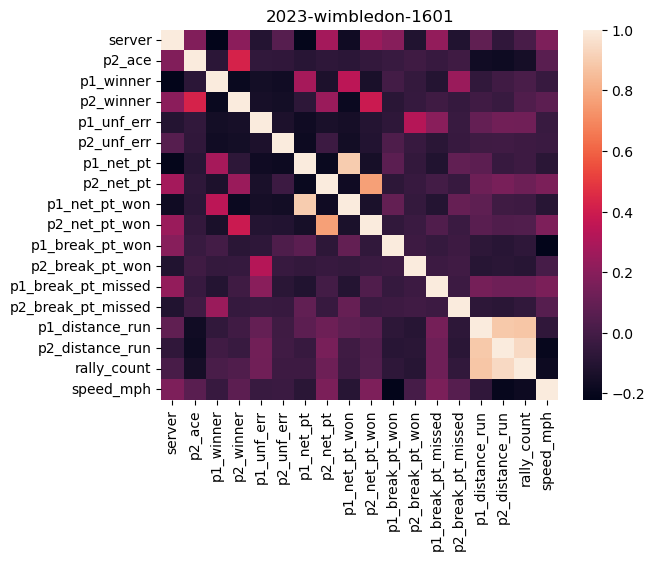

2023-wimbledon-1602


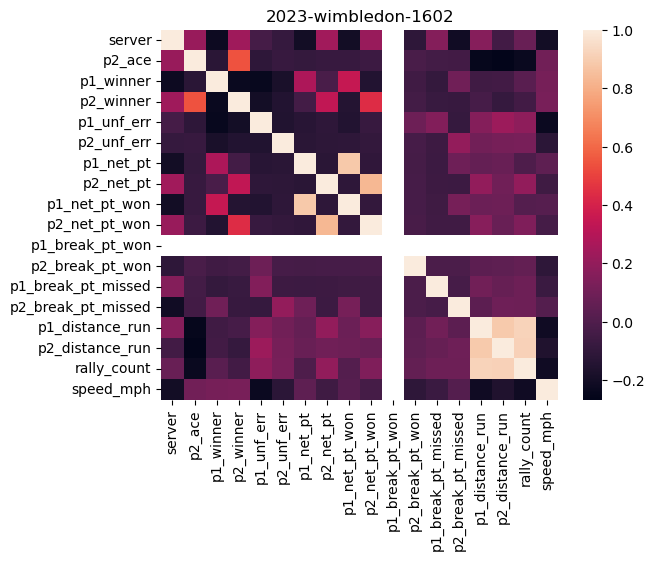

2023-wimbledon-1701


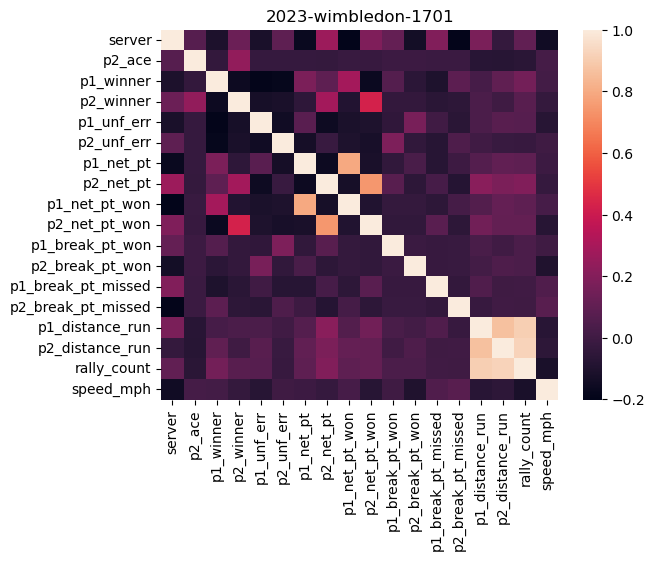

In [145]:
for match_id in df["match_id"].unique():
    df1 = df.loc[df["match_id"] == match_id]
    print(match_id)
    sns.heatmap(data = df1[["server","p2_ace","p1_winner","p2_winner",#"winner_shot_type",
            "p1_unf_err","p2_unf_err","p1_net_pt","p2_net_pt",
            "p1_net_pt_won","p2_net_pt_won","p1_break_pt_won","p2_break_pt_won",
            "p1_break_pt_missed","p2_break_pt_missed","p1_distance_run","p2_distance_run","rally_count","speed_mph"]].corr("pearson"))
    plt.title(match_id)
    plt.savefig("/Users/wangqinxin/Desktop/mcm/heatmap/"+match_id+".png", bbox_inches='tight')
    plt.show()


In [140]:
df = pd.read_csv("Wimbledon_featured_matches.csv")
df = df.loc[df["match_id"] == "2023-wimbledon-1701"]
df = df.loc[df["set_no"] == 3]

df[["p1_points_won","p2_points_won"]]

,p1_points_won,p2_points_won
7089,67,73
7090,67,74
7091,67,75
7092,68,75
7093,69,75
...,...,...
7154,104,101
7155,105,101
7156,106,101
7157,106,102


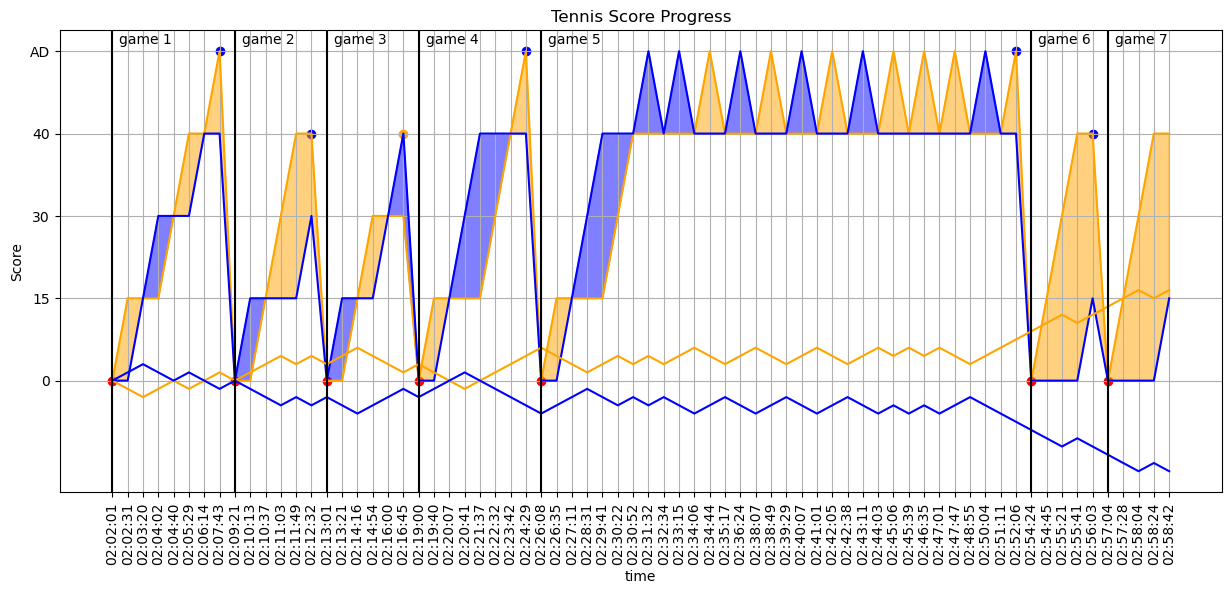

In [141]:
plt.figure(figsize=(15, 6))

# 绘制比分曲线
sns.lineplot(x = df["elapsed_time"], y = df["p1_score"], color = "orange")#, label='Carlos Alcaraz')
sns.lineplot(x = df["elapsed_time"], y = df["p2_score"], color = "blue")#, label='Novak Djokovic')
sns.lineplot(x = df["elapsed_time"], y = 0.1*((df["p1_points_won"] - 67) -( df["p2_points_won"]-73)), color = "orange")
sns.lineplot(x = df["elapsed_time"], y = 0.1*(df["p2_points_won"]-73 - df["p1_points_won"]+67), color = "blue")
#sns.lineplot(x = df["elapsed_time"], y = df["p1_score"]-df["p2_score"])
# 添加标签和标题
plt.xlabel('time')
plt.ylabel('Score')
plt.title('Tennis Score Progress')

# 添加网格
plt.grid()

# 添加比分标记
game = 1

for i, (p1, p2) in enumerate(zip(df["p1_score"], df["p2_score"])):
    if p1 == "0" and p2 == "0" :
    # beginning of a new game
        plt.axvline(x = i, color = "black", alpha = 1)
        plt.scatter(x = i, y = 0, color = "red", marker="o")
        plt.annotate("game " +  str(game), (i, "AD"),textcoords= "offset points",
                     xytext=(5, 5), ha = "left")
        game += 1

        if i>= 1 and df["p1_score"].iloc[i-1] < df["p2_score"].iloc[i-1]:
            plt.scatter(x = i-1, y = df["p2_score"].iloc[i-1], color = "orange", marker = "o")
        elif i>=1  and df["p1_score"].iloc[i-1] > df["p2_score"].iloc[i-1]:
            plt.scatter(x = i-1, y = df["p1_score"].iloc[i-1], color = "blue", marker = "o")
    if game == 8 and p1 == "0" and p2 == "40":
        print("yeah")
        plt.scatter(x = i, y = df["p2_score"].iloc[i], color = "orange", marker = "o")
    


# 添加游戏和盘比分标记
# for i, (game, set) in enumerate(zip(games, sets)):
#     plt.annotate(f'Game {game}\nSet {set}', (i, 0), textcoords="offset points", xytext=(0, -20), ha='center')

# 添加图例
ax = plt.gca()

# 翻转y轴
ax.invert_yaxis()
plt.fill_between(df["elapsed_time"], df["p1_score"], df["p2_score"], where=(df["p1_score"] >= df["p2_score"]), interpolate=True, color='orange', alpha=0.5)
plt.fill_between(df["elapsed_time"],  df["p1_score"], df["p2_score"], where=(df["p1_score"] < df["p2_score"]), interpolate=True, color='blue', alpha=0.5)

plt.xticks(rotation=90)

plt.savefig("/Users/wangqinxin/Desktop/mcm/lineplot/0.png", bbox_inches='tight')
# 显示图表
plt.show()
